In [131]:
#IMPORT LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# Enable full-width display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1500)

In [132]:

# 2. LOAD DATA


# Place your downloaded data in: data/raw/xente_dataset.csv
data_path = r"C:\Users\hp\Pictures\Bati Bank\Credit-Risk-Probability-Model-for-Alternative-Data\data\raw\CreditRisk-data.csv"

df = pd.read_csv(data_path)

# View structure
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [133]:

# 3. BASIC OVERVIEW


print("📌 Dataset Dimensions:")
print(df.shape)

print("\n📌 Column Data Types:")
print(df.dtypes)

print("\n📌 Preview:")
df.head()


📌 Dataset Dimensions:
(95662, 16)

📌 Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

📌 Preview:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [134]:
df['TransactionStartTime'].dtype


dtype('O')

In [135]:
import pandas as pd

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])


In [136]:
df['TransactionStartTime'].dtype


datetime64[ns, UTC]

In [137]:
df['TransactionStartTime'].isna().sum()

np.int64(0)

In [138]:
df['TransactionStartTime'] = pd.to_datetime(
    df['TransactionStartTime'], 
    errors='coerce'
)


In [139]:
df['transaction_year'] = df['TransactionStartTime'].dt.year
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_hour'] = df['TransactionStartTime'].dt.hour


In [140]:
# Convert CountryCode to category
df["CountryCode"] = df["CountryCode"].astype("category")

# Verify
df.dtypes


TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                        category
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
transaction_year                      int32
transaction_month                     int32
transaction_day                       int32
transaction_hour                      int32
dtype: object

In [141]:
# Convert CountryCode to categorical type
df['CountryCode'] = df['CountryCode'].astype('category')

# Verify the change
df['CountryCode'].dtype


CategoricalDtype(categories=[256], ordered=False, categories_dtype=int64)

In [142]:
df['CountryCode'].value_counts()


CountryCode
256    95662
Name: count, dtype: int64

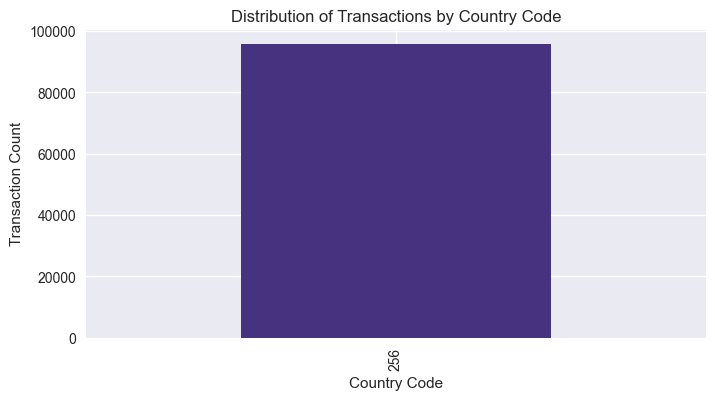

In [143]:
import matplotlib.pyplot as plt

df['CountryCode'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Distribution of Transactions by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Transaction Count")
plt.show()


In [144]:
df['CurrencyCode'].nunique(), df['CurrencyCode'].unique()


(1, array(['UGX'], dtype=object))

In [145]:
df['AccountId'].nunique(), df['CustomerId'].nunique()


(3633, 3742)

In [146]:
df['AccountId'].value_counts().head(10)


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

In [147]:
df['CustomerId'].value_counts().head(10)


CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64

- Only one currency (UGX) is present in the dataset.
- This simplifies modeling since no currency normalization is required.
- However, if multiple currencies were expected, this may indicate:
  - Data filtering issues
  - Incomplete ingestion
  - Business scope limited to Uganda


In [148]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0
transaction_year,95662.0,2018.497115,0.499994,2018.0,2018.0,2018.0,2019.0,2019.0
transaction_month,95662.0,6.566233,5.224310,1.0,1.0,11.0,12.0,12.0
transaction_day,95662.0,15.902898,8.962822,1.0,8.0,16.0,24.0,31.0
transaction_hour,95662.0,12.447722,4.846964,0.0,8.0,13.0,17.0,23.0


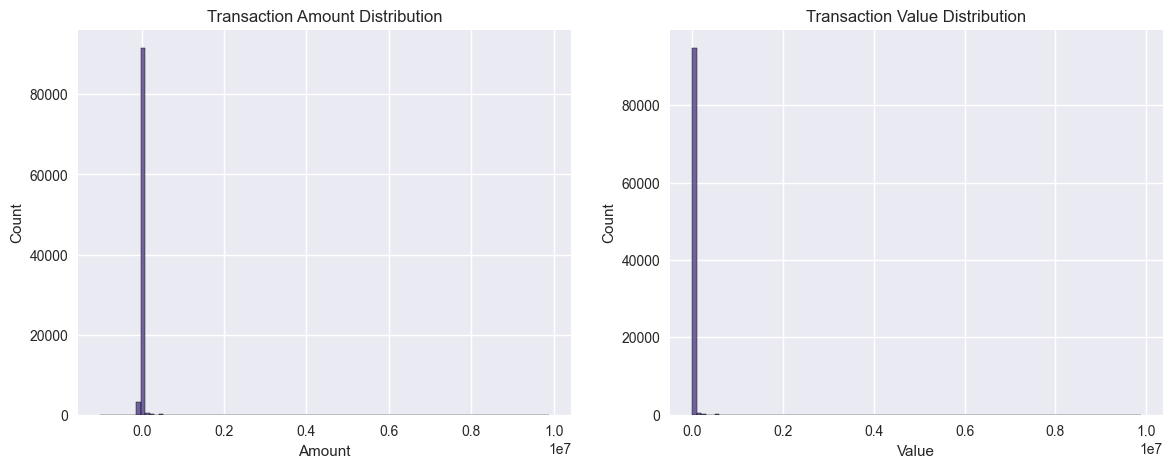

In [149]:
#Raw Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df["Amount"], bins=100, ax=ax[0])
ax[0].set_title("Transaction Amount Distribution")

sns.histplot(df["Value"], bins=100, ax=ax[1])
ax[1].set_title("Transaction Value Distribution")

plt.show()


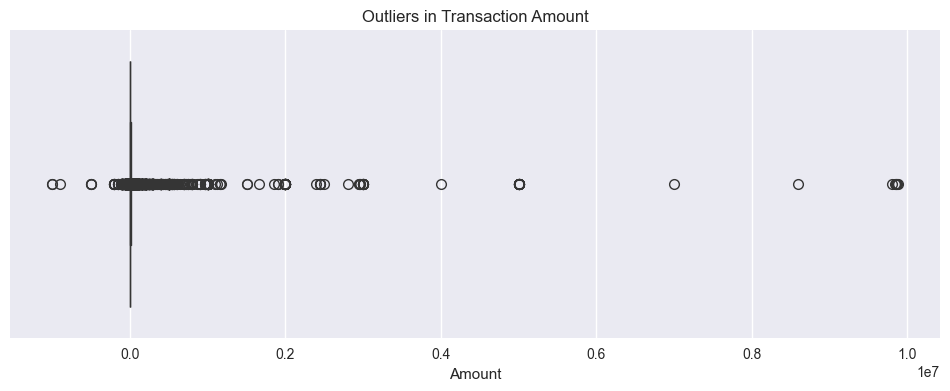

In [150]:
#Outlier Detection (Boxplots)
plt.figure(figsize=(12, 4))
sns.boxplot(x=df["Amount"])
plt.title("Outliers in Transaction Amount")
plt.show()


In [151]:
#Investigating Extreme Values
df.sort_values("Amount").head(5)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_year,transaction_month,transaction_day,transaction_hour
55763,TransactionId_33290,BatchId_33774,AccountId_4249,SubscriptionId_4429,CustomerId_7338,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-1000000.0,1000000,2019-01-10 14:23:21+00:00,4,0,2019,1,10,14
55757,TransactionId_64133,BatchId_100855,AccountId_4249,SubscriptionId_4429,CustomerId_7338,UGX,256,ProviderId_4,ProductId_10,airtime,ChannelId_2,-1000000.0,1000000,2019-01-10 14:17:57+00:00,4,0,2019,1,10,14
55822,TransactionId_56954,BatchId_76447,AccountId_4249,SubscriptionId_4429,CustomerId_7339,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-900000.0,900000,2019-01-10 15:48:59+00:00,4,1,2019,1,10,15
60834,TransactionId_126320,BatchId_93368,AccountId_4249,SubscriptionId_4429,CustomerId_7429,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.0,500000,2019-01-15 11:09:57+00:00,0,1,2019,1,15,11
55841,TransactionId_73797,BatchId_127642,AccountId_4249,SubscriptionId_4429,CustomerId_7339,UGX,256,ProviderId_4,ProductId_10,airtime,ChannelId_2,-500000.0,500000,2019-01-10 16:03:35+00:00,4,1,2019,1,10,16


In [152]:
df["Amount_log"] = np.sign(df["Amount"]) * np.log1p(np.abs(df["Amount"]))


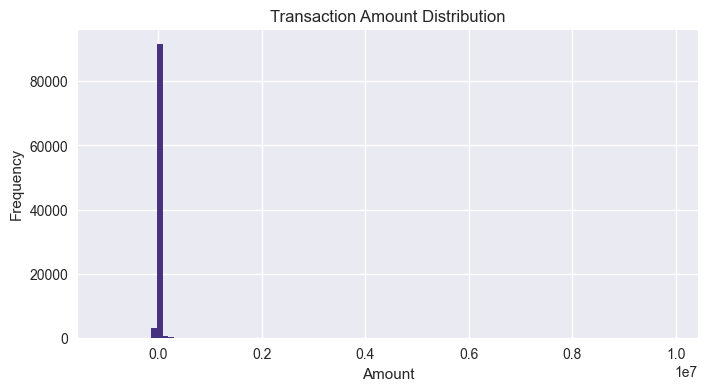

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df['Amount'], bins=100)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


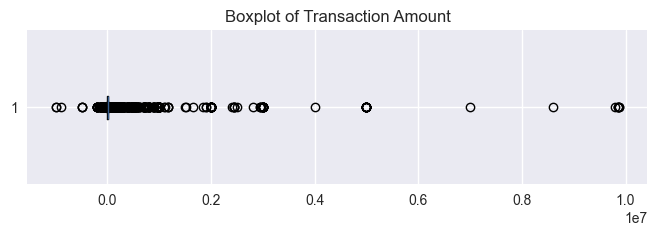

In [154]:
plt.figure(figsize=(8, 2))
plt.boxplot(df['Amount'], vert=False)
plt.title('Boxplot of Transaction Amount')
plt.show()


In [155]:

# 4. SUMMARY STATISTICS


df.describe(include="all")


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_year,transaction_month,transaction_day,transaction_hour,Amount_log
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,1.0,6,23,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,28,30893,32630,4091,95662,95662.0,38189,32635,45405,56935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,2019-01-02 01:15:52.886433536+00:00,2.255974,0.002018,2018.497115,6.566233,15.902898,12.447722,2.502228
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,2018-11-15 02:18:49+00:00,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,-13.815512
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,2018-12-12 09:47:57.750000128+00:00,2.000000,0.000000,2018.000000,1.000000,8.000000,8.000000,-3.931826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,2018-12-31 17:20:45+00:00,2.000000,0.000000,2018.000000,11.000000,16.000000,13.000000,6.908755
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,2019-01-25 10:54:47.500000+00:00,2.000000,0.000000,2019.000000,12.000000,24.000000,17.000000,7.937732
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.880000e+06,9.880000e+06,2019-02-13 10:01:28+00:00,4.000000,1.000000,2019.000000,12.000000,31.000000,23.000000,16.106023


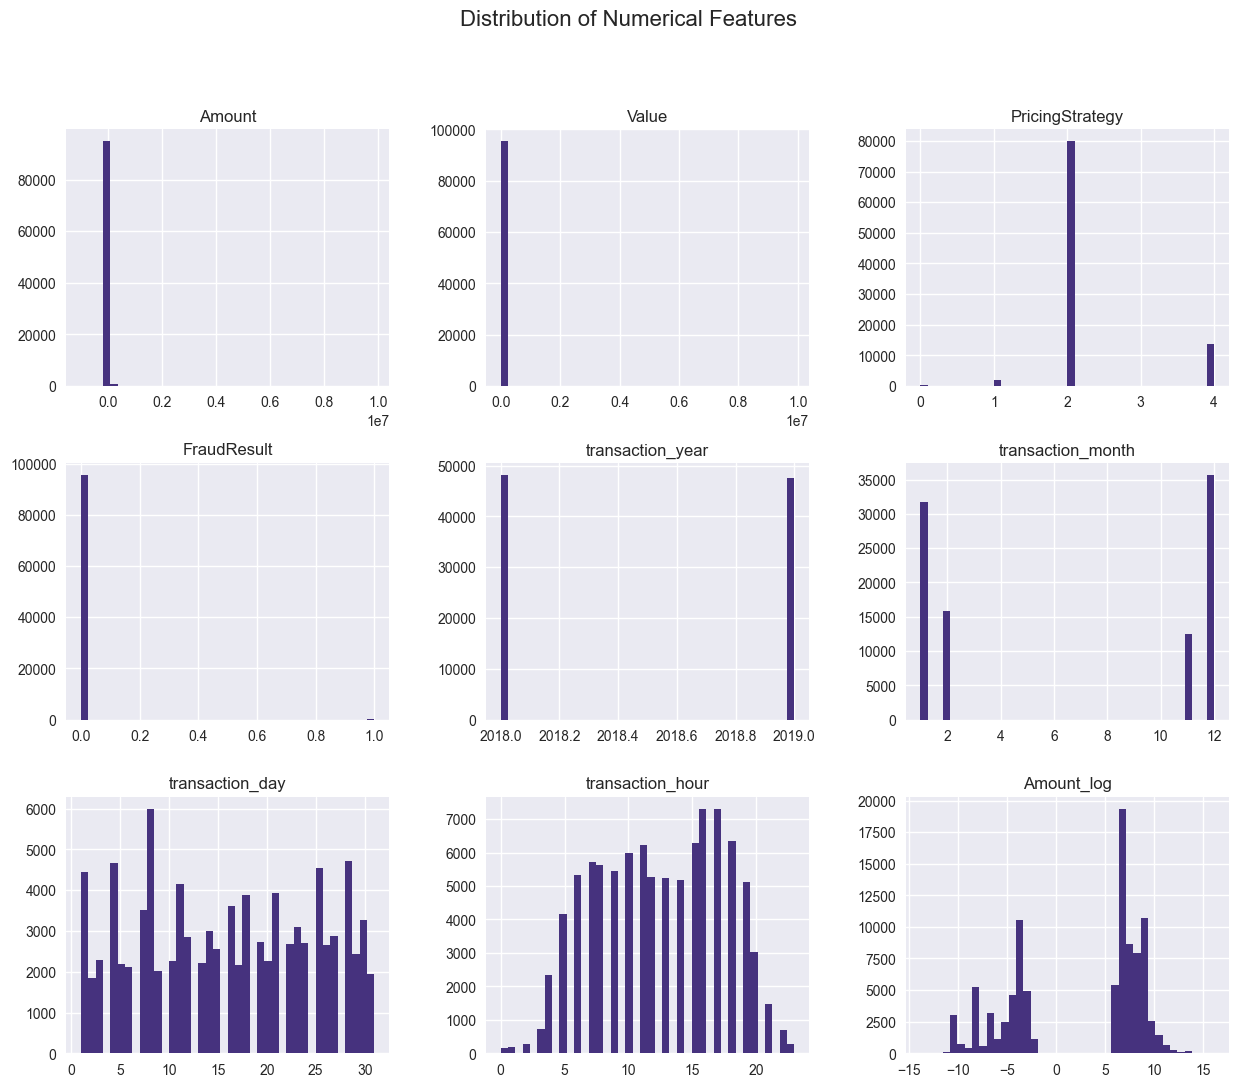

In [156]:

# 5. DISTRIBUTION OF NUMERIC FEATURES


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

df[numeric_cols].hist(figsize=(15, 12), bins=40)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


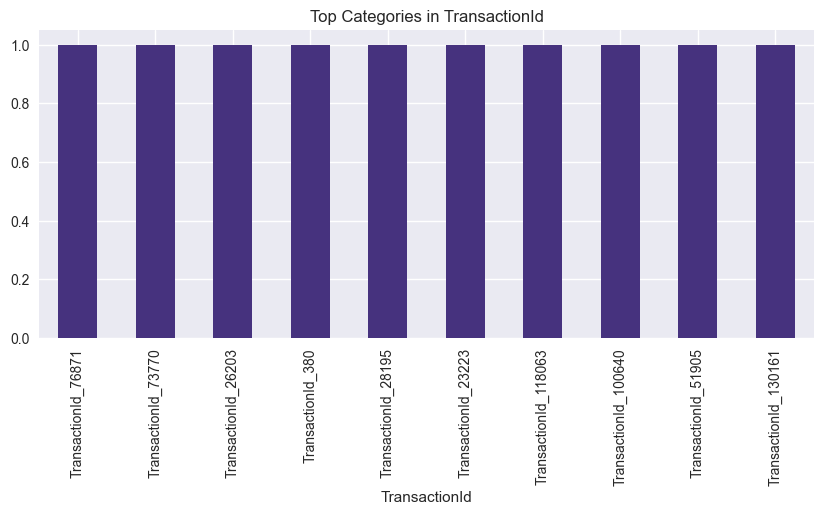

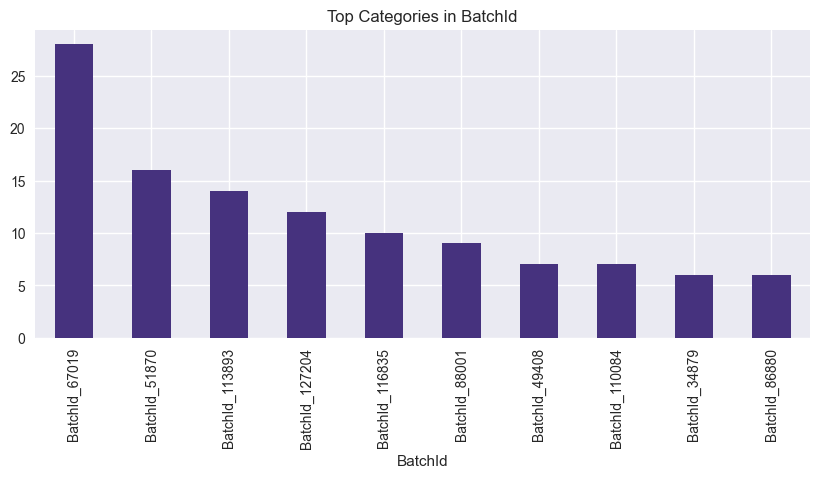

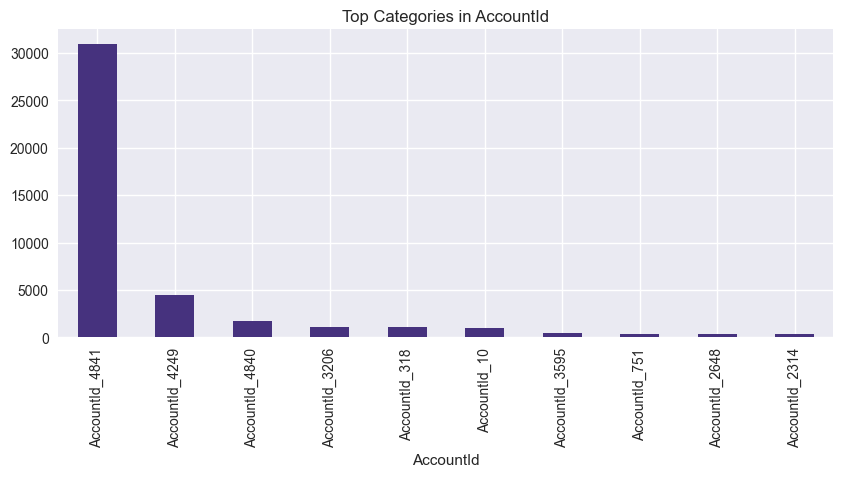

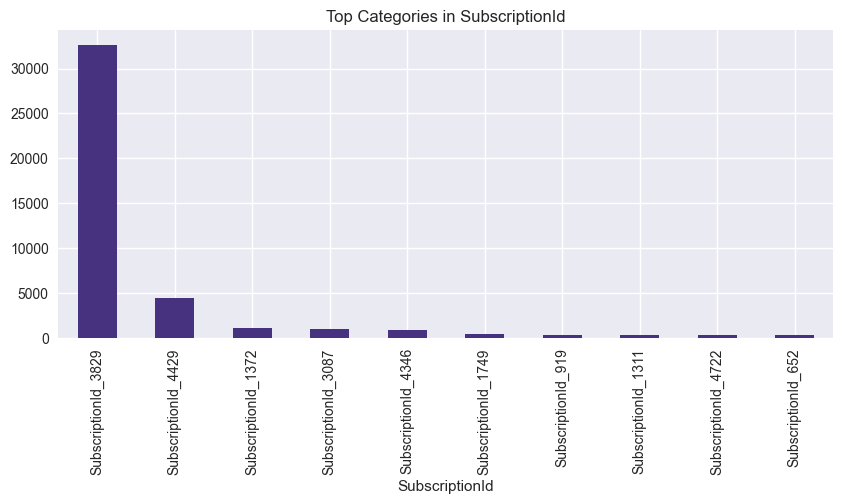

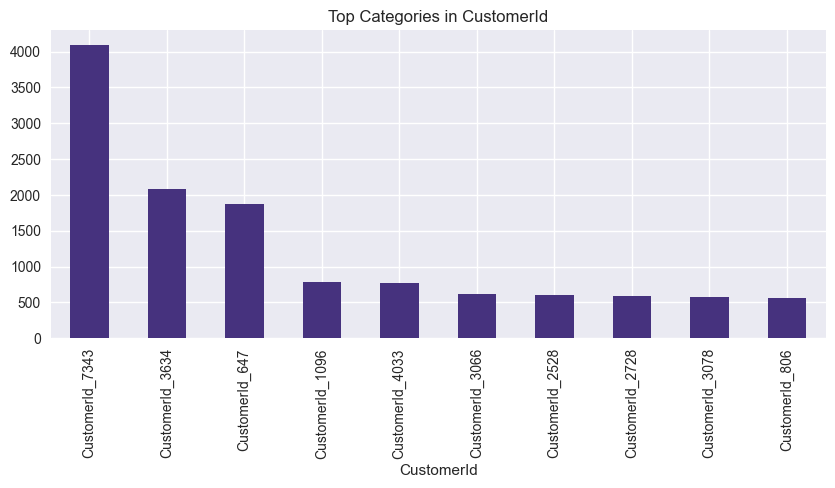

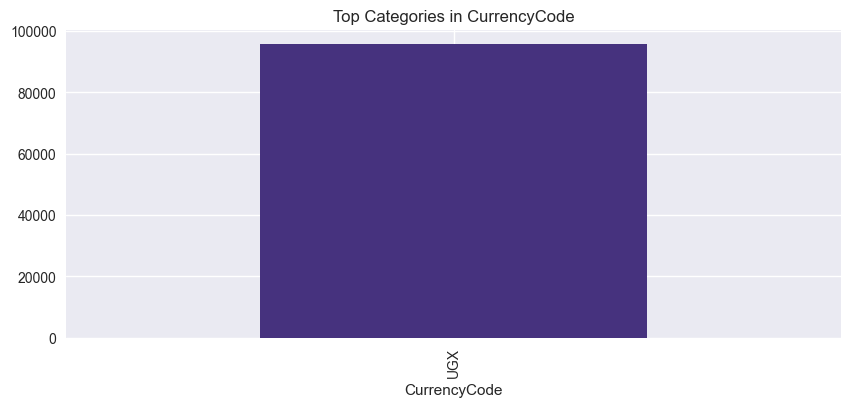

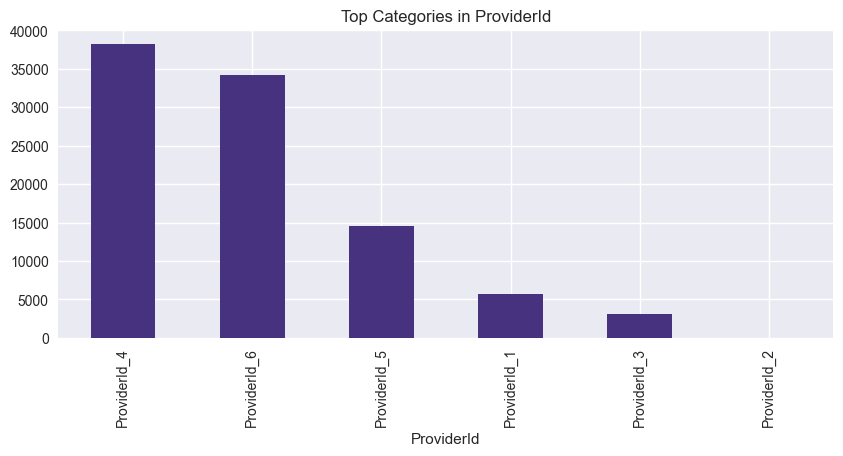

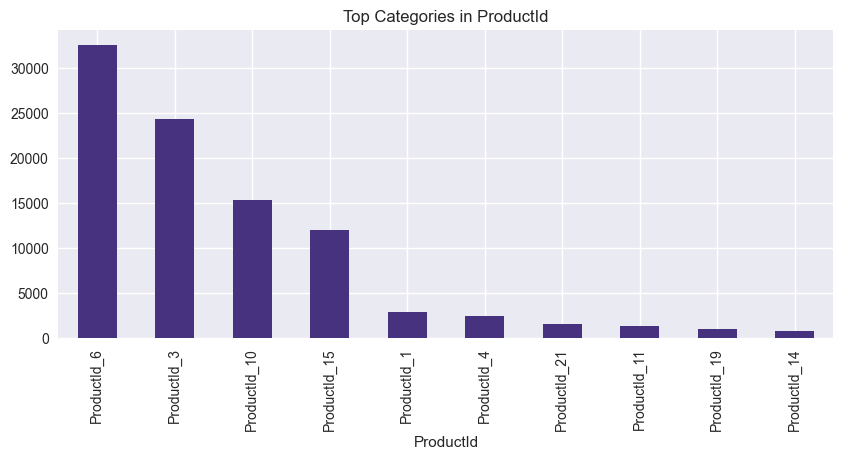

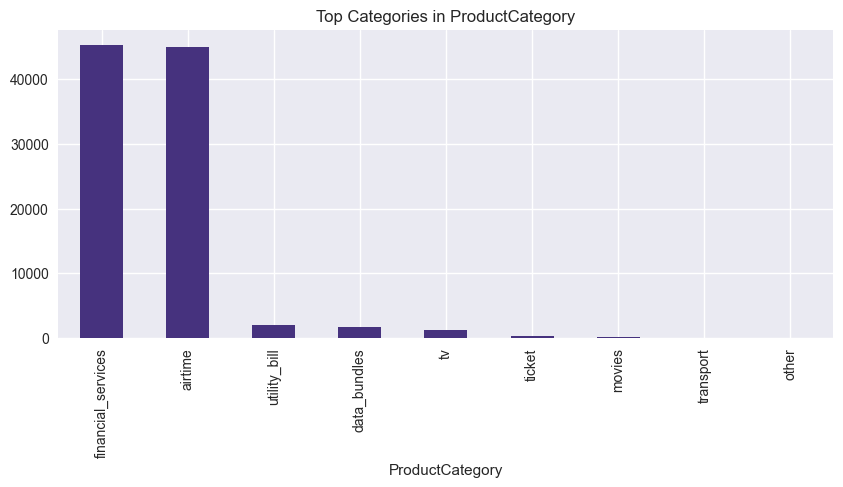

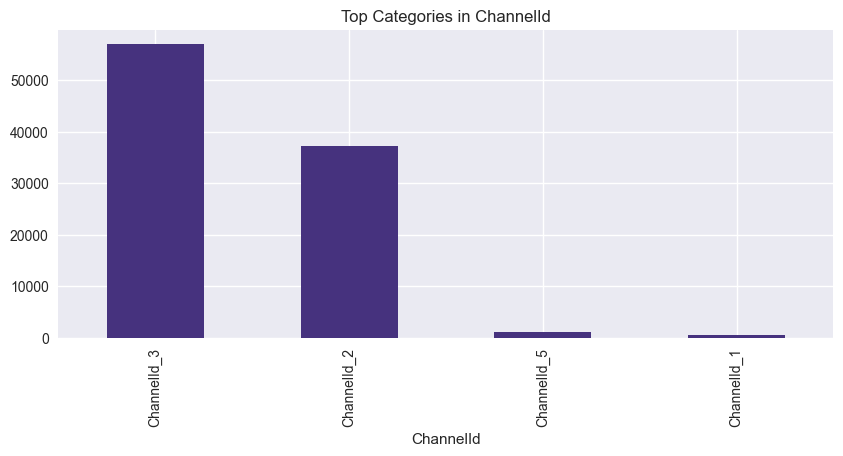

In [157]:

# 6. DISTRIBUTION OF CATEGORICAL FEATURES


categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()


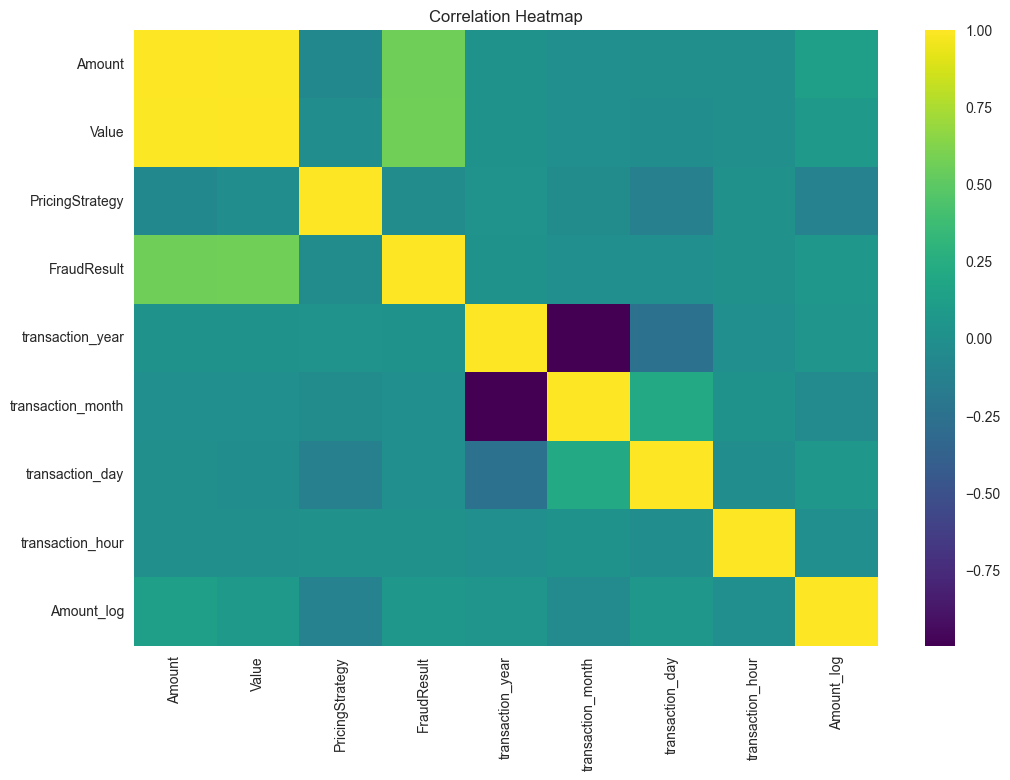

,Amount,Value,PricingStrategy,FraudResult,transaction_year,transaction_month,transaction_day,transaction_hour,Amount_log
Amount,1.000000,0.989692,-0.061931,0.557370,0.010738,-0.009060,-0.003905,-0.001611,0.119257
Value,0.989692,1.000000,-0.017020,0.566739,0.012001,-0.010452,-0.024104,0.000474,0.073536
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821,0.029757,-0.031291,-0.131597,0.007423,-0.122450
FraudResult,0.557370,0.566739,-0.033821,1.000000,0.009811,-0.008887,-0.008636,0.008295,0.068706
transaction_year,0.010738,0.012001,0.029757,0.009811,1.000000,-0.996205,-0.247493,-0.009621,0.046641
transaction_month,-0.009060,-0.010452,-0.031291,-0.008887,-0.996205,1.000000,0.207837,0.012241,-0.046175
transaction_day,-0.003905,-0.024104,-0.131597,-0.008636,-0.247493,0.207837,1.000000,-0.019464,0.057829
transaction_hour,-0.001611,0.000474,0.007423,0.008295,-0.009621,0.012241,-0.019464,1.000000,-0.008594
Amount_log,0.119257,0.073536,-0.122450,0.068706,0.046641,-0.046175,0.057829,-0.008594,1.000000


In [158]:

# 7. CORRELATION ANALYSIS


plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap="viridis", annot=False)
plt.title("Correlation Heatmap")
plt.show()

corr


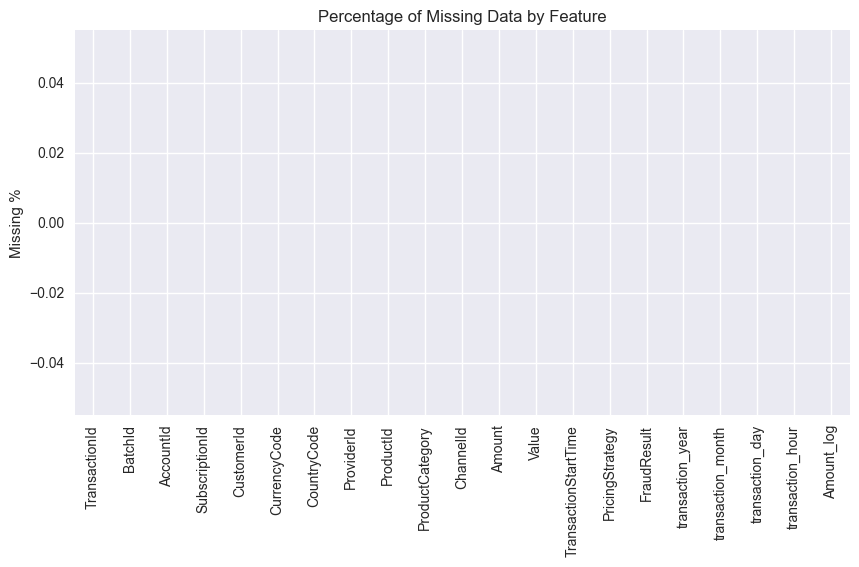

TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
transaction_year        0.0
transaction_month       0.0
transaction_day         0.0
transaction_hour        0.0
Amount_log              0.0
dtype: float64

In [159]:

# 8. MISSING VALUES

missing = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
missing.plot(kind="bar")
plt.title("Percentage of Missing Data by Feature")
plt.ylabel("Missing %")
plt.show()

missing


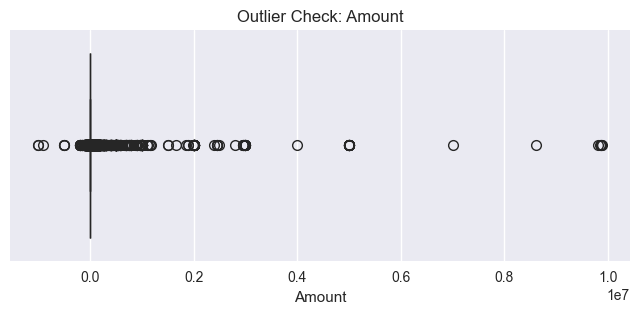

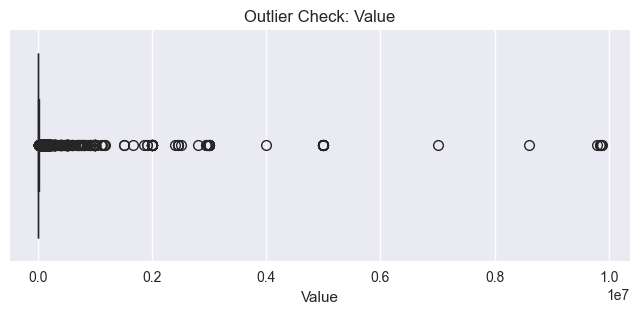

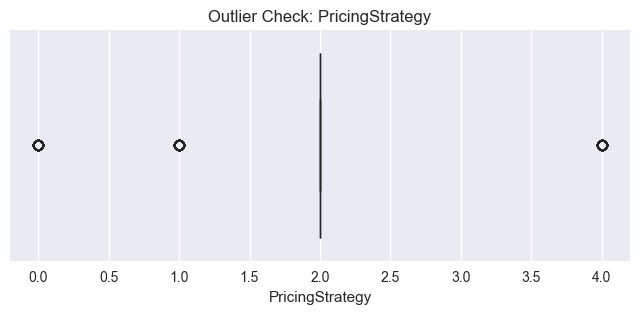

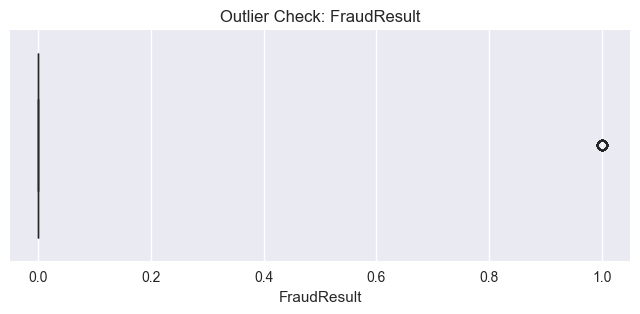

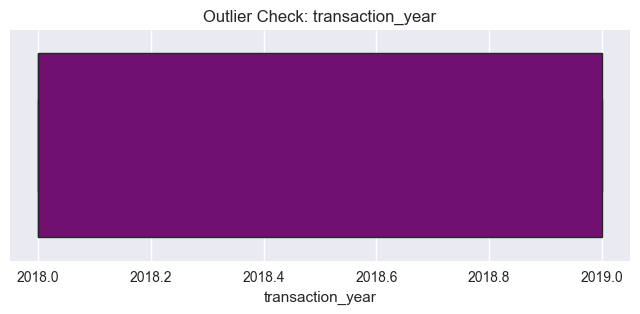

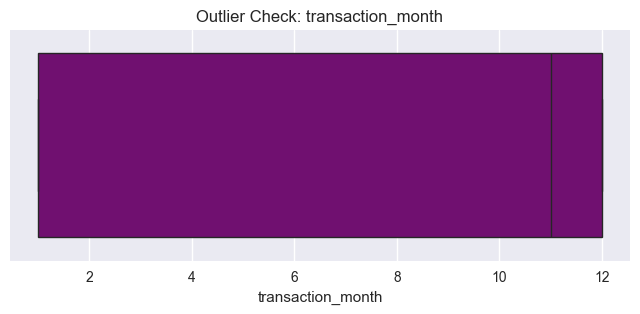

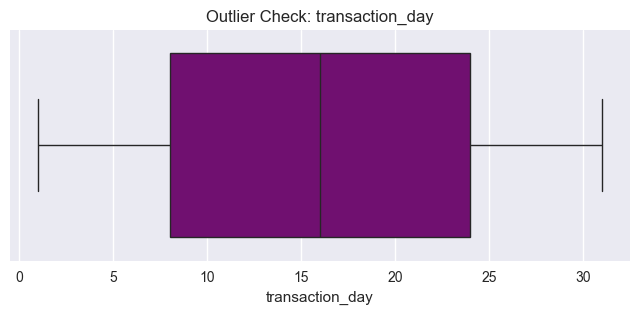

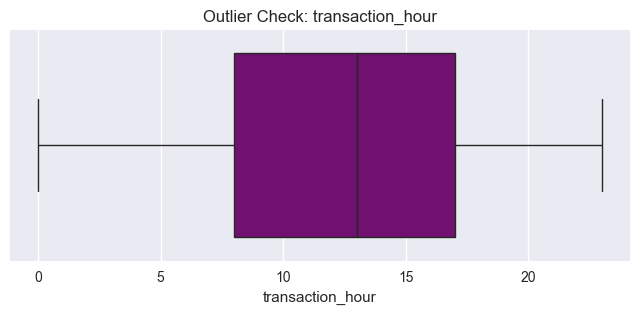

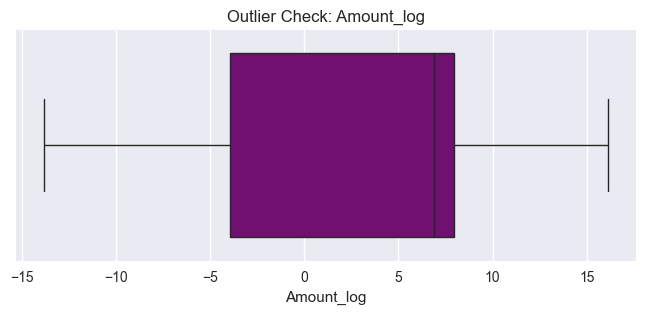

In [160]:

# 9. OUTLIER DETECTION
# (using boxplots)


for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color="purple")
    plt.title(f"Outlier Check: {col}")


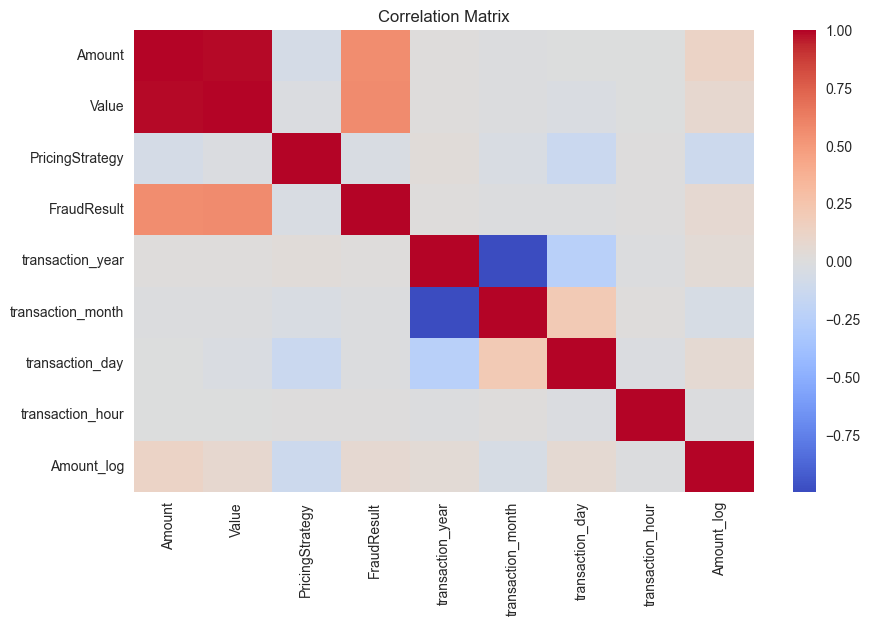

In [163]:
num_cols = df.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


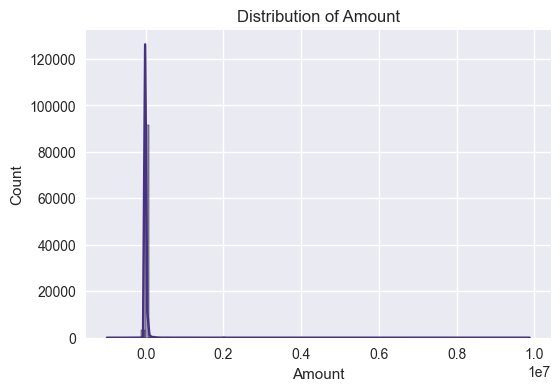

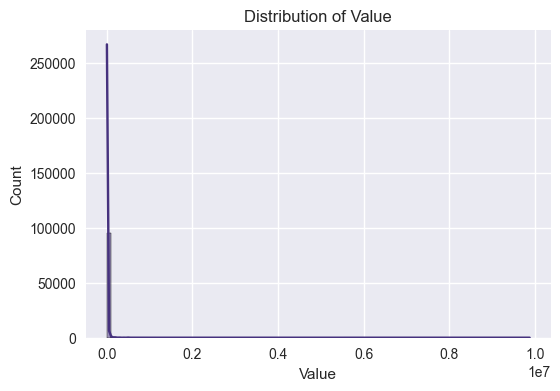

In [164]:
#Distribution of Numerical Features
num_cols = ["Amount", "Value"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [173]:
df.to_csv(r"C:\Users\hp\Pictures\Bati Bank\Credit-Risk-Probability-Model-for-Alternative-Data\data\process\transactions_cleaned.csv", index=False)
